In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
colums = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [4]:
dataset = pd.read_csv(path, names=colums)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print (classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

Confusion Matrix:
[[ 9  0  0]
 [ 0 12  1]
 [ 0  0  8]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


In [2]:
import pandas as pd
df = pd.read_csv('combinedCyclePlant.csv')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [5]:
df.shape

(9568, 5)

In [6]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB



Anlam	                          İsim	          Menzil
Ortam sıcaklığı	                   AT	     1.81 – 37.11°C
Ortam basıncı	                    AP	     992.89 – 1033.30 milibar
Bağıl nem	                        RH	     %25.56 – %100.16
Egzoz Vakum	                        V	     25,36 – 81,56 cm Hg
Saatlik elektrik enerjisi çıkışı    PE	     420,26 – 495,76 MW

In [8]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


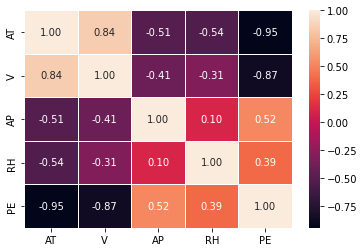

In [9]:
# correlation map
import seaborn
import matplotlib.pyplot as plt
seaborn.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.2f')
plt.show()

AT ve PE arasındaki korelasyon -0,95. İki değişken arasında güçlü bir ilişki mevcut demektir. Basit Doğrusal Regresyon modelinde PE tahmini için AT bağımsız değişken ve PE bağımlı değişkendir.

In [10]:
X= df.iloc[:, 0:1].values
y = df.iloc[:, -1].values # PE

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math
import numpy as np
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression()
y_pred = model.predict(X_test) 
mse=mean_squared_error (y_test,y_pred)
print('MAE : ',mean_absolute_error (y_test,y_pred))
print('MSE : ',mean_squared_error (y_test,y_pred))
print('RMSE: ', math. sqrt(mse))
print('R^2 Score: ',r2_score(y_test,y_pred))

MAE :  4.250846944659115
MSE :  28.694770943271152
RMSE:  5.356750035541247
R^2 Score:  0.9016982750293471


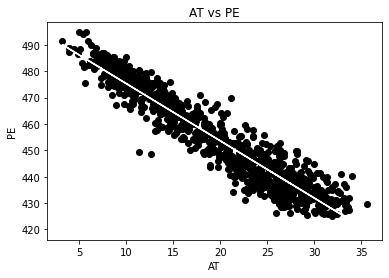

In [18]:
plt.scatter(X_test, y_test, color = 'black')  
plt.plot(X_test, model.predict(X_test), color = 'white')   
plt.title('AT vs PE')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

MULTIPLE LINEAR REGRESSION

In [21]:
X2 = df.iloc[:, :-1].values #PE hariç tüm değişkenler
y2 = df.iloc[:, -1].values #PE

In [23]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.1, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2_train, y2_train)
LinearRegression()

y2_pred = regressor.predict(X2_test)
mse=mean_squared_error (y2_test,y2_pred)
print('MAE : ',mean_absolute_error (y2_test,y2_pred))
print('MSE : ',mean_squared_error (y_test,y_pred))
print('RMSE: ', math. sqrt(mse))
print('R^2 Score: ',r2_score(y2_test,y2_pred))

MAE :  3.620746014081507
MSE :  28.694770943271152
RMSE:  4.479879625181444
R^2 Score:  0.9312470929972922


KNN REGRESSION

In [28]:
from sklearn.neighbors import KNeighborsRegressor
X3 = df.iloc[:, :-1].values #PE hariç tüm değişkenler
y3 = df.iloc[:, -1].values #PE
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.1)

knn_model = KNeighborsRegressor().fit(X3_train, y3_train)
predicted_values = knn_model.predict(X3_test)
predict_df = pd.DataFrame({"Y_Test" : y3_test, "Y_Predicted" : predicted_values})
predict_df.head()

,Y_Test,Y_Predicted
0,426.18,429.820
1,451.10,448.692
2,442.87,440.972
3,443.70,445.362
4,460.59,461.172


In [32]:
print("Mean Squared Error : ", mean_squared_error(predict_df.Y_Predicted, predict_df.Y_Test))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(predict_df.Y_Predicted, predict_df.Y_Test)))
print("R^2 Score : ",r2_score(predict_df.Y_Predicted, predict_df.Y_Test))
print("Mean Absolute Error : ",mean_absolute_error(predict_df.Y_Predicted, predict_df.Y_Test))

Mean Squared Error :  15.23432081504702
Root Mean Squared Error :  3.903116807763639
R^2 Score :  0.9452910462188893
Mean Absolute Error :  2.865903866248694


R^2 =%94. 
R^2‘nin yüksek olması regresyon modelinin iyi olduğunu gösterir. 

Basit doğrusal lineer regresyon, çoklu doğrusal lineer regresyon, polinom regresyon ve KNN regresyon modellerinden en yüksek sonucu veren, tahminlemeyi en yüksek oranda doğru yapmış olan model KNN regresyon modelidir. KNN regresyonda MAE, MSE ve RMSE metriklerinde de iyileşme görülmektedir.